In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import pandas as pd

titanic = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Handle missing values

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Drop 'Cabin' column, since it has too many missing values
titanic.drop(['Cabin'], axis=1, inplace=True)

In [8]:
# Fill missing values with the median value of 'Age'
titanic.Age = titanic.Age.fillna(titanic.Age.median())

In [9]:
titanic.Embarked = titanic.Embarked.fillna(titanic.Embarked.mode()[0])

In [10]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Feature engeneering 


In [11]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [12]:
# Drop irrelevant features
titanic.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Exploratory Data Analysis


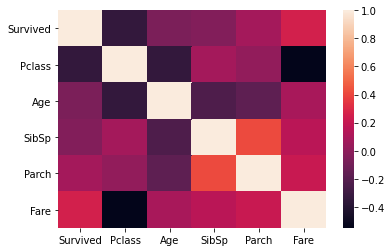

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix 
sns.heatmap(titanic.corr())
plt.show()

In [14]:
# Get survivals 
survived_index = titanic.Survived == True
survived = titanic[survived_index]

# Not survivals
death_index = titanic.Survived == False
death = titanic[survived_index]

# Check
print(survived.shape[0] == survived.Survived.sum())

survived.tail()

True


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
875,1,3,female,15.0,0,0,7.2250,C
879,1,1,female,56.0,0,1,83.1583,C
880,1,2,female,25.0,0,1,26.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


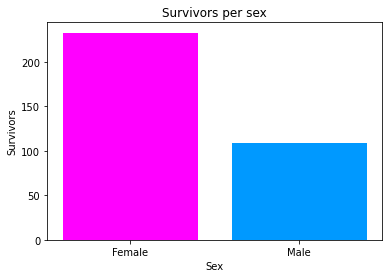

In [15]:
# Survivors per sex
categories = ['Female', 'Male']
survs = [survived.Sex.value_counts()[0], survived.Sex.value_counts()[1]]

plt.bar(
    x = categories,
    height = survs, 
    color = ['#ff00ff', '#0099ff']
);
plt.title('Survivors per sex')
plt.xlabel('Sex')
plt.ylabel('Survivors')
plt.show()

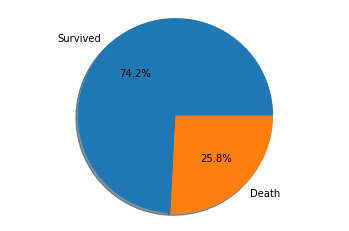

In [16]:
# Female surviving rate
labels = "Survived", "Death"

female = titanic.Sex == 'female'
fem_df = titanic[female]
sizes = [fem_df.Survived.value_counts()[1], fem_df.Survived.value_counts()[0]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True);
ax.axis('equal')
plt.show()

In [17]:
fem_df.Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

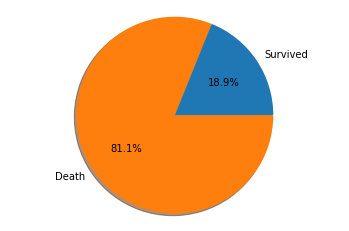

In [18]:
# Male surviving rate
labels = "Survived", "Death"

male = titanic.Sex == 'male'
mal_df = titanic[male]
sizes = [mal_df.Survived.value_counts()[1], mal_df.Survived.value_counts()[0]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True);
ax.axis('equal')
plt.show()

In [19]:
mal_df.Survived.value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [20]:
# Survivors per age range
print("Max: ", max(titanic.Age.value_counts().index))
print("Min: ", min(titanic.Age.value_counts().index))

Max:  80.0
Min:  0.42


In [21]:
titanic['Age_range'] = pd.cut(
    titanic.Age, 
    bins = [0, 20, 40, 60, 80],
    labels = ['Young', 'Adult', 'Senior', 'Old']
)

titanic[['Age', 'Age_range']].head(20)

,Age,Age_range
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,28.0,Adult
6,54.0,Senior
7,2.0,Young
8,27.0,Adult
9,14.0,Young


In [22]:
titanic.Age_range.value_counts()

Adult     562
Young     179
Senior    128
Old        22
Name: Age_range, dtype: int64

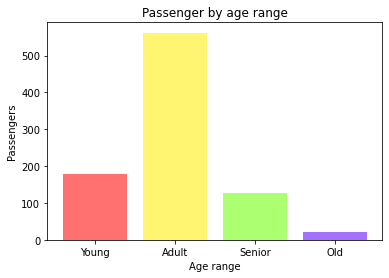

In [23]:
categories = ['Young', 'Adult', 'Senior', 'Old']
survs = [titanic.Age_range.value_counts()[i] for i in categories]

plt.bar(
    x = categories,
    height = survs, 
    color = ['#ff7070', '#fff570', '#acff70', '#a470ff']
);

plt.title('Passenger by age range')
plt.xlabel('Age range')
plt.ylabel('Passengers')
plt.show()

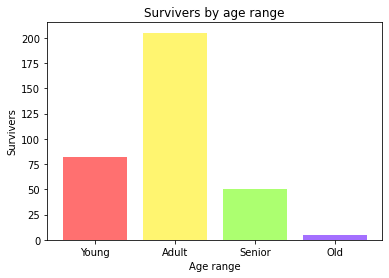

In [24]:
survived_index = titanic.Survived == True
survived = titanic[survived_index]

survs = [survived.Age_range.value_counts()[i] for i in categories]

plt.bar(
    x = categories,
    height = survs, 
    color = ['#ff7070', '#fff570', '#acff70', '#a470ff']
);

plt.title('Survivers by age range')
plt.xlabel('Age range')
plt.ylabel('Survivers')
plt.show()

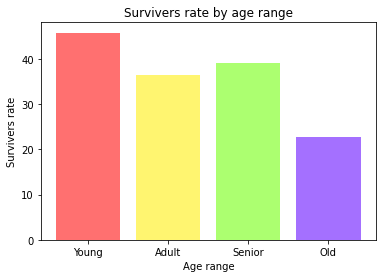

In [25]:
survs = [(survived.Age_range.value_counts()[i]/titanic.Age_range.value_counts()[i])*100 for i in categories]

plt.bar(
    x = categories,
    height = survs, 
    color = ['#ff7070', '#fff570', '#acff70', '#a470ff']
);

plt.title('Survivers rate by age range')
plt.xlabel('Age range')
plt.ylabel('Survivers rate')
plt.show()

In [26]:
class_surv = survived.Pclass

survs = [i for i in class_surv.value_counts()]
survs

[136, 119, 87]

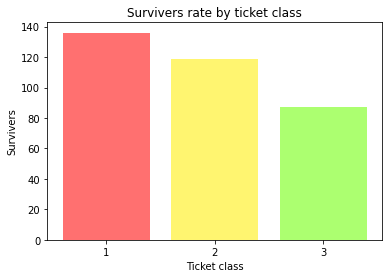

In [27]:
# Survivers per class
class_surv = survived.Pclass

survs = [i for i in class_surv.value_counts()]

plt.bar(
    x = ['1', '2', '3'],
    height = survs, 
    color = ['#ff7070', '#fff570', '#acff70']
);

plt.title('Survivers rate by ticket class')
plt.xlabel('Ticket class')
plt.ylabel('Survivers')
plt.show()

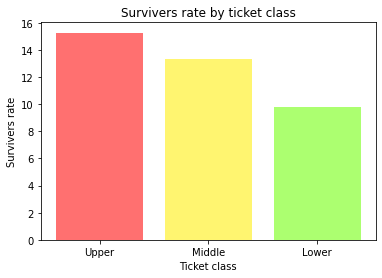

In [28]:
# Survivers rate per class
survs = [(i/titanic.shape[0])*100 for i in class_surv.value_counts()]

plt.bar(
    x = ['Upper', 'Middle', 'Lower'],
    height = survs, 
    color = ['#ff7070', '#fff570', '#acff70']
);

plt.title('Survivers rate by ticket class')
plt.xlabel('Ticket class')
plt.ylabel('Survivers rate')
plt.show()

In [29]:
# Encode categorical values
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range
0,0,3,male,22.0,1,0,7.2500,S,Adult
1,1,1,female,38.0,1,0,71.2833,C,Adult
2,1,3,female,26.0,0,0,7.9250,S,Adult
3,1,1,female,35.0,1,0,53.1000,S,Adult
4,0,3,male,35.0,0,0,8.0500,S,Adult


In [30]:
titanic.replace(
    {
        'female': 0, 'male': 1, 
        'S': 0, 'C': 1, 'Q': 2, 
        'Young': 0, 'Adult': 1, 'Senior': 3, 'Old': 4
    }, 
    inplace = True
)

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [31]:
from sklearn.decomposition import PCA 

# Dimensionality reduction for data visualizing 
pca = PCA(n_components=2)

titanic_red = pca.fit_transform(titanic)

print(pca.explained_variance_ratio_)

[0.93496376 0.06384309]


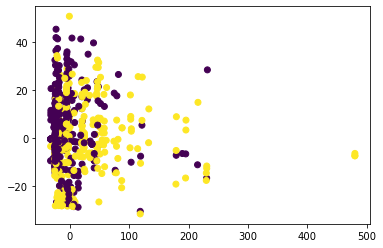

In [32]:
plt.scatter(
    titanic_red[:, 0], titanic_red[:, 1], 
    c = titanic.Survived, 
)

### Make predictions

In [33]:
X = titanic.drop(['Survived'], axis=1)
y = titanic.Survived

In [34]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

logistic = LogisticRegression() 
cross_val_score(logistic, X, y, cv=5).mean()

0.7934906785512523

In [35]:
from sklearn.svm import SVC

svc = SVC() 
cross_val_score(svc, X, y, cv=5).mean()

0.6734982110350888

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier() 
cross_val_score(forest, X, y, cv=5).mean()

0.8081036971941498

In [37]:
from sklearn.model_selection import GridSearchCV 

params = {
    'n_estimators': np.arange(20, 151, 10), 
    'min_samples_leaf': np.arange(1, 15, 2)
}

grid = GridSearchCV(
    estimator = RandomForestClassifier(), 
    param_grid = params, 
    scoring = 'accuracy',
    cv = 4 
)

grid.fit(X, y)

grid.best_estimator_

RandomForestClassifier(min_samples_leaf=3, n_estimators=30)

In [38]:
grid.best_score_

0.8316618187694421

In [39]:
model = grid.best_estimator_

In [40]:
test_set = pd.read_csv('/kaggle/input/titanic/test.csv')
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [41]:
test_set.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [42]:
indexes = test_set.PassengerId
test_set.drop(['PassengerId'], axis=1, inplace=True)

In [43]:
test_set.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [44]:
test_set['Fare'] = test_set['Fare'].fillna(test_set.Fare.mean())

In [45]:
test_set.Age = test_set['Age'].fillna(test_set.Age.mean())

In [46]:
test_set.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [47]:
test_set['Age_rrange'] = pd.cut(
    test_set.Age, 
    bins = [0, 20, 40, 60, 80],
    labels = ['Young', 'Adult', 'Senior', 'Old']
)

test_set[['Age', 'Age_rrange']].head()

,Age,Age_rrange
0,34.5,Adult
1,47.0,Senior
2,62.0,Old
3,27.0,Adult
4,22.0,Adult


In [48]:
test_set.replace(
    {
        'female': 0, 'male': 1, 
        'S': 0, 'C': 1, 'Q': 2, 
        'Young': 0, 'Adult': 1, 'Senior': 3, 'Old': 4
    }, 
    inplace = True
)

test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_rrange
0,3,1,34.5,0,0,7.8292,2,1
1,3,0,47.0,1,0,7.0000,0,3
2,2,1,62.0,0,0,9.6875,2,4
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1


In [49]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,1,1
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [50]:
predictions = model.predict(test_set)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
output = pd.DataFrame(
    data = {'PassengerId': indexes, 'Survived': predictions}, 
    columns = ['PassengerId', 'Survived']
)

output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [52]:
output.to_csv('Output.csv', index=False)